# Question 3: Has COVID had an impact during holiday seasons? 

### COVID Start & End Date:
----------------------------------------------------------------
* Start Date: January 24, 2020
* End Date: February 24, 2022 => [Article from Chicago.gov](https://www.chicago.gov/city/en/sites/covid-19/home/health-orders.html)

In [1]:
import pandas as pd
import os
from zipfile import ZipFile
import holidays
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10, 4)

In [2]:
# Zip File Extraction
    # ? Insead of extracting one zip file at a given time, we will extract all the zip files using a for loop
def unzip_files(zip_path, extract_path):
    for zip_path in zip_paths:
        with ZipFile (zip_path, 'r') as zObject:
        # * Extracting all memebters of the zip files into a specific location
            zObject.extractall(
                path = extract_path
            )
# * Usage zip function - Variables:
zip_paths = ["/Users/galbeeir/Desktop/git/crime_analysis/filtered_1.zip", "/Users/galbeeir/Desktop/git/crime_analysis/filtered_2.zip"]
extract_path = "/Users/galbeeir/Desktop/git/crime_analysis/"

# * Executing the zip function
unzip_files(zip_paths, extract_path)


In [3]:
# * List of directories
datasets_1 = "/Users/galbeeir/Desktop/git/crime_analysis/CSVs"

# * List all the files from the directory
file_list_1 = os.listdir(datasets_1)

# * Merge all files stored in file_list
crime_df = pd.DataFrame()

# * Merge all files stored in file_list_1
for file in file_list_1:

    if file.endswith(".csv"):
        file_path = os.path.join(datasets_1, file)
        df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')
        crime_df = pd.concat([crime_df, df])

     
crime_df.head()


/var/folders/06/47q5ms9540g4mnz8nnnyl32m0000gn/T/ipykernel_3837/3239953675.py:15: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')
/var/folders/06/47q5ms9540g4mnz8nnnyl32m0000gn/T/ipykernel_3837/3239953675.py:15: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')
/var/folders/06/47q5ms9540g4mnz8nnnyl32m0000gn/T/ipykernel_3837/3239953675.py:15: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')
/var/folders/06/47q5ms9540g4mnz8nnnyl32m0000gn/T/ipykernel_3837/3239953675.py:15: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')
/var/folders/06/

,Unnamed: 0,ID,Case Number,Date,Year,Updated On,Block,Primary Type,Location Description,Arrest,Domestic,Police District,Ward,Community Area,Latitude,Longitude
0,807159,12581817,JF100052,2022-01-01 00:00:00,2022,2023-01-03 15:46:28,080XX S CRANDON AVE,BATTERY,RESIDENCE,True,True,4,8.0,South Chicago,41.749260,-87.56863
1,807160,12581845,JF100074,2022-01-01 00:00:00,2022,2023-01-03 15:46:28,013XX S MICHIGAN AVE,BATTERY,APARTMENT,True,True,1,3.0,Near South Side,41.865147,-87.62410
2,807161,12581875,JF100038,2022-01-01 00:00:00,2022,2023-01-03 15:46:28,116XX S CHURCH ST,CRIMINAL DAMAGE,RESIDENCE,False,False,22,34.0,Morgan Park,41.681515,-87.67086
3,807162,12581981,JF100073,2022-01-01 00:00:00,2022,2023-01-03 15:46:28,133XX S CORLISS AVE,CRIMINAL DAMAGE,APARTMENT,False,False,5,9.0,Riverdale,41.653637,-87.60207
4,807163,12582064,JF100392,2022-01-01 00:00:00,2022,2023-01-03 15:46:28,019XX S HALSTED ST,THEFT,VEHICLE NON-COMMERCIAL,False,False,12,11.0,Lower West Side,41.856380,-87.64660


In [4]:
# Dropping the unamed column
crime_df.drop(['Unnamed: 0', 'Block'], axis=1, inplace=True)

In [5]:
# Transforming the data type to date format
crime_df['Date'] = pd.to_datetime(
    crime_df['Date'],
    errors = 'coerce',
    infer_datetime_format=True, 
)

In [6]:
crime_df['Updated On'] = pd.to_datetime(
    crime_df['Updated On'],
    errors = 'coerce',
    infer_datetime_format=True, 
    format ='%T'
)

In [68]:
# Transforming the Ward to & Police destricts to Category
crime_df = crime_df.astype({'Police District': 'category'})

In [73]:
crime_df['Ward'] = pd.to_numeric(crime_df['Ward'], errors='coerce').astype('Int8')

In [74]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028014 entries, 156498 to 124417
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID                    1028014 non-null  int64         
 1   Case Number           1028014 non-null  object        
 2   Date                  1028014 non-null  datetime64[ns]
 3   Year                  1028014 non-null  int64         
 4   Updated On            1028014 non-null  datetime64[ns]
 5   Primary Type          1028014 non-null  object        
 6   Location Description  1028014 non-null  object        
 7   Arrest                1028014 non-null  bool          
 8   Domestic              1028014 non-null  bool          
 9   Police District       1028014 non-null  category      
 10  Ward                  1027968 non-null  Int8          
 11  Community Area        1028014 non-null  object        
 12  Latitude              1028014 non-null

In [75]:
crime_df.head()

,ID,Case Number,Date,Year,Updated On,Primary Type,Location Description,Arrest,Domestic,Police District,Ward,Community Area,Latitude,Longitude,Is_Holiday,Holiday_name
156498,11786468,JC383237,2019-08-07 21:17:00,2019,2019-08-14 16:17:18,NARCOTICS,STREET,True,False,4,8,Calumet Heights,41.736465,-87.58521,False,None
104326,11709621,JC289778,2019-06-03 05:00:00,2019,2019-07-22 16:08:58,BURGLARY,SMALL RETAIL STORE,True,False,19,32,Lincoln Park,41.925175,-87.66651,False,None
104327,11710759,JC291723,2019-06-03 05:00:00,2019,2019-06-30 15:56:27,OTHER OFFENSE,APARTMENT,False,False,25,31,Belmont Cragin,41.930584,-87.74996,False,None
104328,11711168,JC291809,2019-06-03 05:15:00,2019,2019-06-30 15:56:27,DECEPTIVE PRACTICE,DRUG STORE,False,False,19,44,Lake View,41.940320,-87.64441,False,None
104329,11711192,JC291807,2019-06-03 05:15:00,2019,2019-06-30 15:56:27,THEFT,ATHLETIC CLUB,False,False,19,47,Lake View,41.940903,-87.66869,False,None


In [76]:
# Get the list of holidays for a specific country/region
us_holidays = holidays.US()

In [77]:
crime_df['Is_Holiday'] = crime_df['Date'].apply(lambda x: x in us_holidays)

In [78]:
# Define a function to receive the holiday's name
def get_holiday_name(date):
    for holiday_date, holiday_name in us_holidays.items():
        if date.date() == holiday_date:
            return holiday_name
    return None

In [79]:
crime_df['Holiday_name'] = crime_df['Date'].apply(get_holiday_name)

In [80]:
crime_df.sort_values('Year', inplace=True)

In [81]:
holiday_df = crime_df.loc[crime_df['Is_Holiday']==True]

In [82]:
holiday_df['Holiday_name'].unique()

array(['Christmas Day', 'Veterans Day', 'Columbus Day', 'Thanksgiving',
       'Labor Day', 'Memorial Day', "New Year's Day",
       'Martin Luther King Jr. Day', 'Independence Day',
       "Washington's Birthday", 'Independence Day (Observed)',
       "New Year's Day (Observed)",
       'Juneteenth National Independence Day',
       'Juneteenth National Independence Day (Observed)',
       'Christmas Day (Observed)'], dtype=object)

In [83]:
# Replacing duplicated holidays
    # ? As we can see, the following holidays are duplicates => Independence Day (Observed), Christmas Day (Observed), New Year's Day (Observed), Juneteenth National Independence Day (Observed). 
holiday_df.replace({
    'Independence Day (Observed)': 'Independence Day',
    'Christmas Day (Observed)': 'Christmas Day',
    "New Year's Day (Observed)": "New Year's Day",
    'Juneteenth National Independence Day (Observed)': 'Juneteenth National Independence Day'
}, inplace=True)

/var/folders/06/47q5ms9540g4mnz8nnnyl32m0000gn/T/ipykernel_3837/4089363784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_df.replace({


In [84]:
# See confirmation for the amount of holidays in USA here https://www.commerce.gov/hr/employees/leave/holidays
holiday_df['Holiday_name'].nunique()

11

In [85]:
holiday_df = holiday_df.reset_index(drop=True)

In [86]:
holiday_df.head()

,ID,Case Number,Date,Year,Updated On,Primary Type,Location Description,Arrest,Domestic,Police District,Ward,Community Area,Latitude,Longitude,Is_Holiday,Holiday_name
0,11932093,JC559867,2019-12-25 13:40:00,2019,2020-01-01 15:54:16,ASSAULT,RESIDENCE,False,True,10,24,North Lawndale,41.852535,-87.728424,True,Christmas Day
1,11932568,JC559847,2019-12-25 13:36:00,2019,2020-01-01 15:54:16,BATTERY,RESIDENCE,False,True,16,45,Portage Park,41.949665,-87.755520,True,Christmas Day
2,11932479,JC560142,2019-12-25 13:30:00,2019,2020-01-01 15:54:16,BATTERY,APARTMENT,False,False,12,25,Near West Side,41.867027,-87.654740,True,Christmas Day
3,11935193,JC563621,2019-12-25 23:10:00,2019,2020-01-02 15:53:50,CRIMINAL DAMAGE,PARKING LOT/GARAGE,False,False,24,40,West Ridge,41.995870,-87.675860,True,Christmas Day
4,11932372,JC560190,2019-12-25 22:20:00,2019,2020-01-01 15:54:16,OTHER OFFENSE,APARTMENT,True,True,25,37,Austin,41.909400,-87.763760,True,Christmas Day


### Creating 3 DataFrames (during, post, and prior COVID) based on holiday_df

In [87]:
conditions = [
    holiday_df['Date'] <= "2020-01-24",
    (holiday_df['Date'] >= "2020-01-24") & (holiday_df['Date'] <= "2022-02-28"),
    holiday_df['Date'] > "2022-02-28"
]

choices = ['Prior COVID Holidays', 'During COVID Holidays', 'Post COVID Holidays']

holiday_df['COVID Period'] = np.select(conditions, choices, default ='None')

In [88]:
holiday_df.head()

,ID,Case Number,Date,Year,Updated On,Primary Type,Location Description,Arrest,Domestic,Police District,Ward,Community Area,Latitude,Longitude,Is_Holiday,Holiday_name,COVID Period
0,11932093,JC559867,2019-12-25 13:40:00,2019,2020-01-01 15:54:16,ASSAULT,RESIDENCE,False,True,10,24,North Lawndale,41.852535,-87.728424,True,Christmas Day,Prior COVID Holidays
1,11932568,JC559847,2019-12-25 13:36:00,2019,2020-01-01 15:54:16,BATTERY,RESIDENCE,False,True,16,45,Portage Park,41.949665,-87.755520,True,Christmas Day,Prior COVID Holidays
2,11932479,JC560142,2019-12-25 13:30:00,2019,2020-01-01 15:54:16,BATTERY,APARTMENT,False,False,12,25,Near West Side,41.867027,-87.654740,True,Christmas Day,Prior COVID Holidays
3,11935193,JC563621,2019-12-25 23:10:00,2019,2020-01-02 15:53:50,CRIMINAL DAMAGE,PARKING LOT/GARAGE,False,False,24,40,West Ridge,41.995870,-87.675860,True,Christmas Day,Prior COVID Holidays
4,11932372,JC560190,2019-12-25 22:20:00,2019,2020-01-01 15:54:16,OTHER OFFENSE,APARTMENT,True,True,25,37,Austin,41.909400,-87.763760,True,Christmas Day,Prior COVID Holidays


### Amount of Offences Per primary Type: Prior, During, and Post COVID

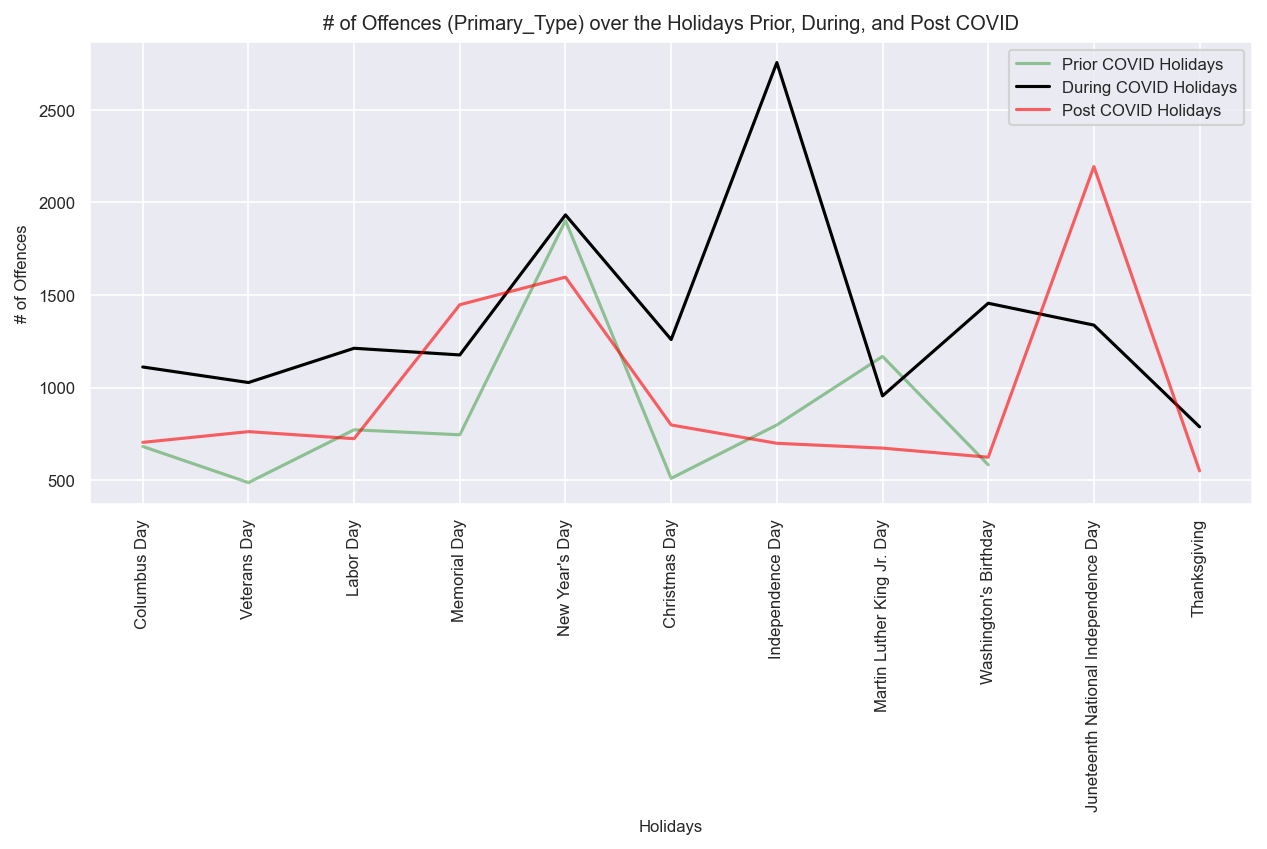

In [89]:
# Grouping Post, During, Prior data
prior_covid_holidays = holiday_df.loc[holiday_df['COVID Period'] == 'Prior COVID Holidays'].groupby('Holiday_name')['Primary Type'].count()
during_covid_holidays = holiday_df.loc[holiday_df['COVID Period'] == 'During COVID Holidays'].groupby('Holiday_name')['Primary Type'].count()
post_covid_holidays = holiday_df.loc[holiday_df['COVID Period'] == 'Post COVID Holidays'].groupby('Holiday_name')['Primary Type'].count()

# Combine all holiday names into a single set
all_holidays = set(prior_covid_holidays.index).union(during_covid_holidays.index).union(post_covid_holidays.index)

# Plot the line charts with the respective holiday names as x-axis labels
prior_covid_holidays.reindex(all_holidays).plot(label='Prior COVID Holidays', color='green', alpha=0.4)
during_covid_holidays.reindex(all_holidays).plot(label='During COVID Holidays', color='black')
post_covid_holidays.reindex(all_holidays).plot(label='Post COVID Holidays', color='red', alpha=0.6)

plt.xticks(range(len(all_holidays)), all_holidays, rotation=90)
plt.xlabel('Holidays')
plt.ylabel('# of Offences')
plt.title("# of Offences (Primary_Type) over the Holidays Prior, During, and Post COVID")
plt.legend()

plt.show()

#### Insights
* During COVID-19 period, Independence Day had the highest amount of offences conducted in the city of Chicago. This might be a direct result of George Floyd's death in 2021 see articles posted in [NBC News](https://www.nbcnews.com/news/us-news/chicago-crime-complicated-truth-behind-defund-police-efforts-n1231381) and [Daily Caller](https://dailycaller.com/2021/07/05/hundreds-shot-across-america-fourth-of-july-weekend/).
    > In Chicago, 13 people were killed, and 64 people were injured, data from the Gun Violence Archives shows. The most shooting attempts occurred in Chicago – 51 of the 490 incidents.
* Post-COVID, Juneteenth had the second highest amount of offence conducted in the city of Chicago. During Juneteenth, serveral incidents of mass shootings occurred in the USA and specifically in Chicago ([Chicago Sun Times](https://chicago.suntimes.com/crime/2023/6/18/23765102/willowbrook-shooting-juneteenth)). According to [The Telegraph](https://www.telegraph.co.uk/news/2023/06/19/juneteenth-racial-slavery-reparations-drugs-crime-biden/) United States is facing some "racial issues". 
* The number of offences during COVID-19 among the following holidays almost doubled: Columbus Day, Veterans Day, and Labor Day.
* Memorial Day was the second point in our plot where the number of crimes was higher relative to the COVID period. During the weekend of Memorial Day, post-COVID, there were [53 shooting incidents in Chicago](https://abcnews.go.com/US/53-people-shot-11-fatally-violent-memorial-day/story?id=99691001#:~:text=More%20than%2050%20people%20were,weekend%20in%20Chicago%2C%20police%20said.)
* Prior to COVID-19, Juneteenth is missing offences data, with 91 offences in Thanksgiving, it might be that the data is lacking. 
* Interestingly, the Prior COVID period reached the same level of crime incidents as the period during COVID. 
* Christmas had the least amount of offences Prior to COVID-19 and the most significant decrease in crime incidents. During COVID-19 period, Martins Luther King Jr. Day had the most significant decrease in crime incidents. 


#### Assumption 
- Given the insights above, one assumption might be that the "govenment political state" has a direct influence on the amount of crime incidents in Chicago and USA in general. 


### Amount of Offences & Arrests Per primary Type: Prior, During, and Post COVID

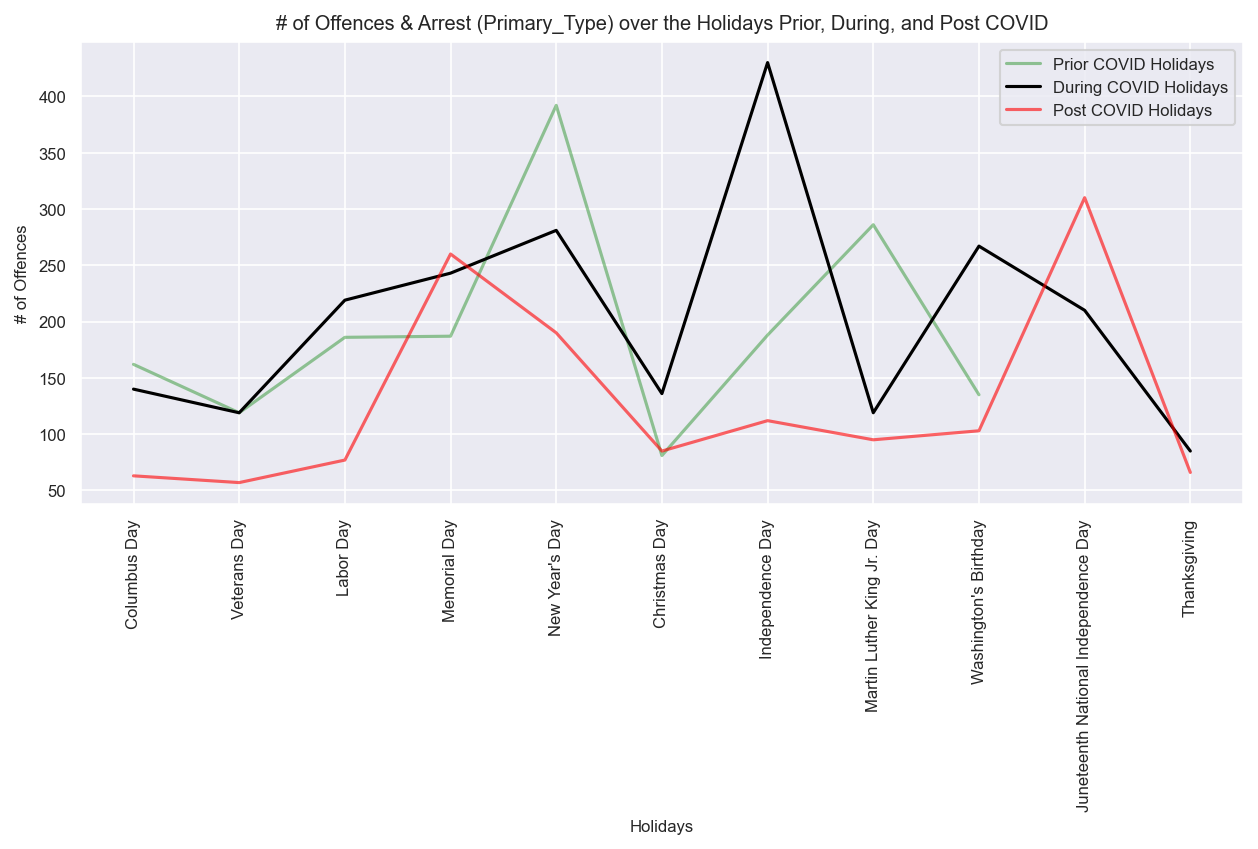

In [90]:
# Grouping Post, During, Prior data
prior_covid_holidays = holiday_df.loc[(holiday_df['COVID Period'] == 'Prior COVID Holidays') & (holiday_df['Arrest']==True)].groupby('Holiday_name')['Primary Type'].count()
during_covid_holidays = holiday_df.loc[(holiday_df['COVID Period'] == 'During COVID Holidays') & (holiday_df['Arrest']==True)].groupby('Holiday_name')['Primary Type'].count()
post_covid_holidays = holiday_df.loc[(holiday_df['COVID Period'] == 'Post COVID Holidays') & (holiday_df['Arrest']==True)].groupby('Holiday_name')['Primary Type'].count()

# Combine all holiday names into a single set
all_holidays = set(prior_covid_holidays.index).union(during_covid_holidays.index).union(post_covid_holidays.index)

# Plot the line charts with the respective holiday names as x-axis labels
prior_covid_holidays.reindex(all_holidays).plot(label='Prior COVID Holidays', color='green', alpha=0.4)
during_covid_holidays.reindex(all_holidays).plot(label='During COVID Holidays', color='black')
post_covid_holidays.reindex(all_holidays).plot(label='Post COVID Holidays', color='red', alpha=0.6)

plt.xticks(range(len(all_holidays)), all_holidays, rotation=90)
plt.xlabel('Holidays')
plt.ylabel('# of Offences')
plt.title("# of Offences & Arrest (Primary_Type) over the Holidays Prior, During, and Post COVID")
plt.legend()

plt.show()

#### Insights Arrests
Previous related insights: 
* During COVID-19 period, Independence Day had the highest amount of offences conducted in the city of Chicago. This might be a direct result of George Floyd's death in 2021 see articles posted in [NBC News](https://www.nbcnews.com/news/us-news/chicago-crime-complicated-truth-behind-defund-police-efforts-n1231381) and [Daily Caller](https://dailycaller.com/2021/07/05/hundreds-shot-across-america-fourth-of-july-weekend/).
    > In Chicago, 13 people were killed, and 64 people were injured, data from the Gun Violence Archives shows. The most shooting attempts occurred in Chicago – 51 of the 490 incidents.
* Post-COVID, Juneteenth had the second highest amount of offence conducted in the city of Chicago. During Juneteenth, serveral incidents of mass shootings occurred in the USA and specifically in Chicago ([Chicago Sun Times](https://chicago.suntimes.com/crime/2023/6/18/23765102/willowbrook-shooting-juneteenth)). According to [The Telegraph](https://www.telegraph.co.uk/news/2023/06/19/juneteenth-racial-slavery-reparations-drugs-crime-biden/) United States is facing some "racial issues". 
* Christmas had the least amount of offences Prior to COVID-19 and the most significant decrease in crime incidents. During COVID-19 period, Martins Luther King Jr. Day had the most significant decrease in crime incidents. 

New insights:
* The amount of crime incidents **with arrests** for during COVID-19 period and for Prior to COVID-19 period almost doubled relative to the amount of crime incidents post COVID-19 period. 
* Post COVID-19 - Columbus Day
* New Year's Day Prior COVID-19
* Marthin Luther King Jr. Day Prior COVID-19
* Washington's Birthday During COVID-19


### Top 5 Offence Locations - COVID Periods

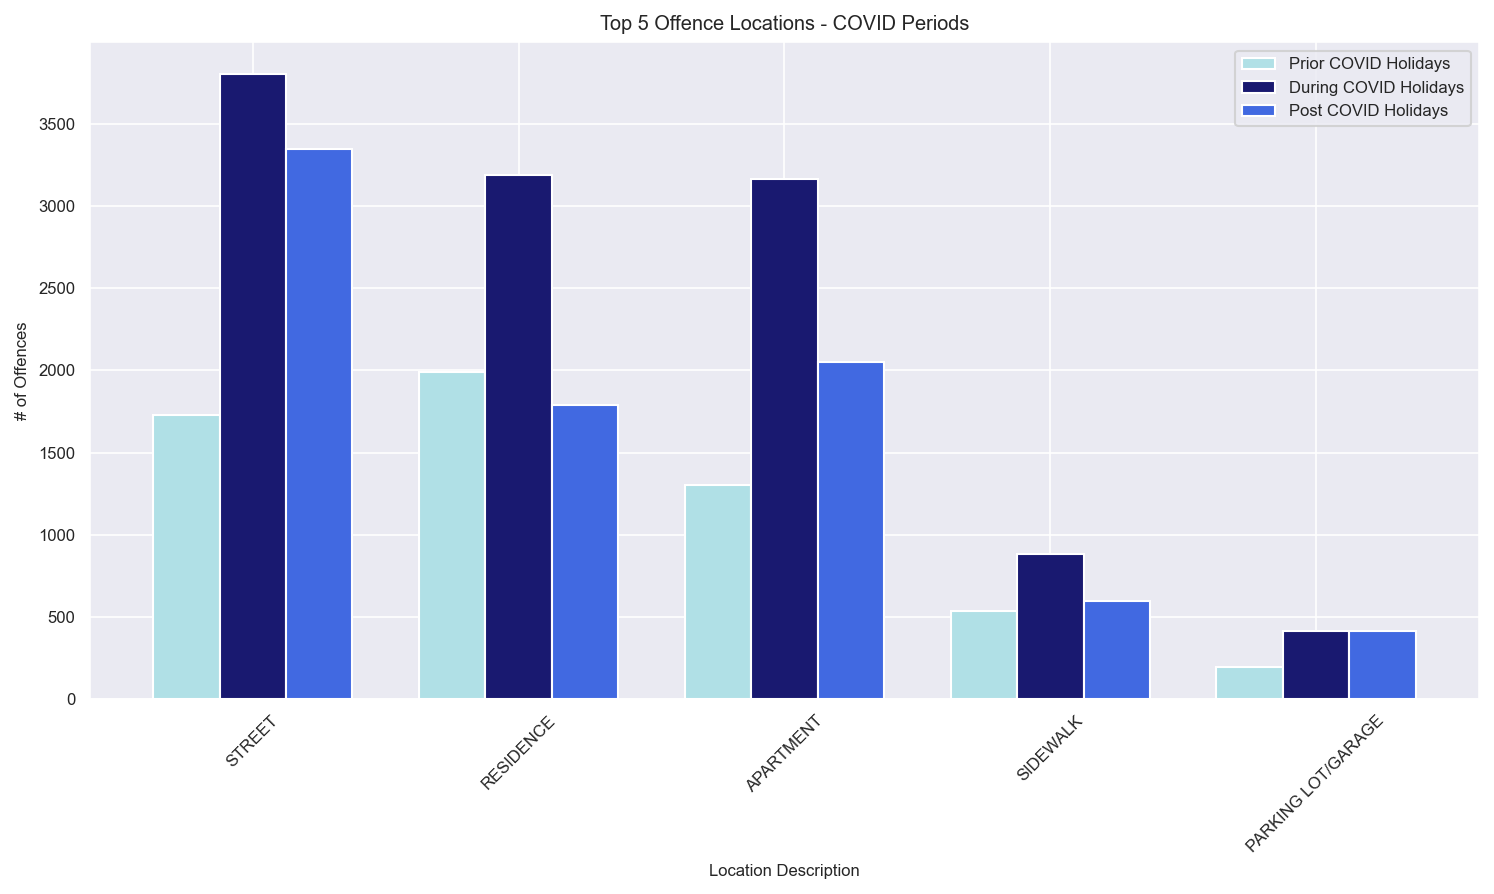

In [91]:
# Grouped bar chart for the top 5 location descriptions
locations = holiday_df.groupby('Location Description')['Holiday_name'].count().sort_values(ascending=False).iloc[:5].index
prior_covid = holiday_df.loc[holiday_df['COVID Period'] == 'Prior COVID Holidays'].groupby('Location Description')['Holiday_name'].count().reindex(locations).values
during_covid = holiday_df.loc[holiday_df['COVID Period'] == 'During COVID Holidays'].groupby('Location Description')['Holiday_name'].count().reindex(locations).values
post_covid = holiday_df.loc[holiday_df['COVID Period'] == 'Post COVID Holidays'].groupby('Location Description')['Holiday_name'].count().reindex(locations).values

# Calculate the positions of the bars
bar_width = 0.25
x = np.arange(len(locations))
x_prior_covid = x - bar_width
x_during_covid = x
x_post_covid = x + bar_width

# *Create the grouped bar chart for each location description
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x_prior_covid, prior_covid, width=bar_width, label='Prior COVID Holidays', color='powderblue')
ax.bar(x_during_covid, during_covid, width=bar_width, color='midnightblue', label='During COVID Holidays')
ax.bar(x_post_covid, post_covid, width=bar_width, label='Post COVID Holidays', color='royalblue')

# *Set the x-axis labels and tick positions
ax.set_xticks(x)
ax.set_xticklabels(locations, rotation=45)
ax.set_xlabel('Location Description')
ax.set_ylabel('# of Offences')
ax.set_title('Top 5 Offence Locations - COVID Periods')
ax.legend()

# *Display the plot
plt.tight_layout()
plt.show()


#### Insight
[Wring something here]

### # of Offences per Ward - Post COVID Holidays

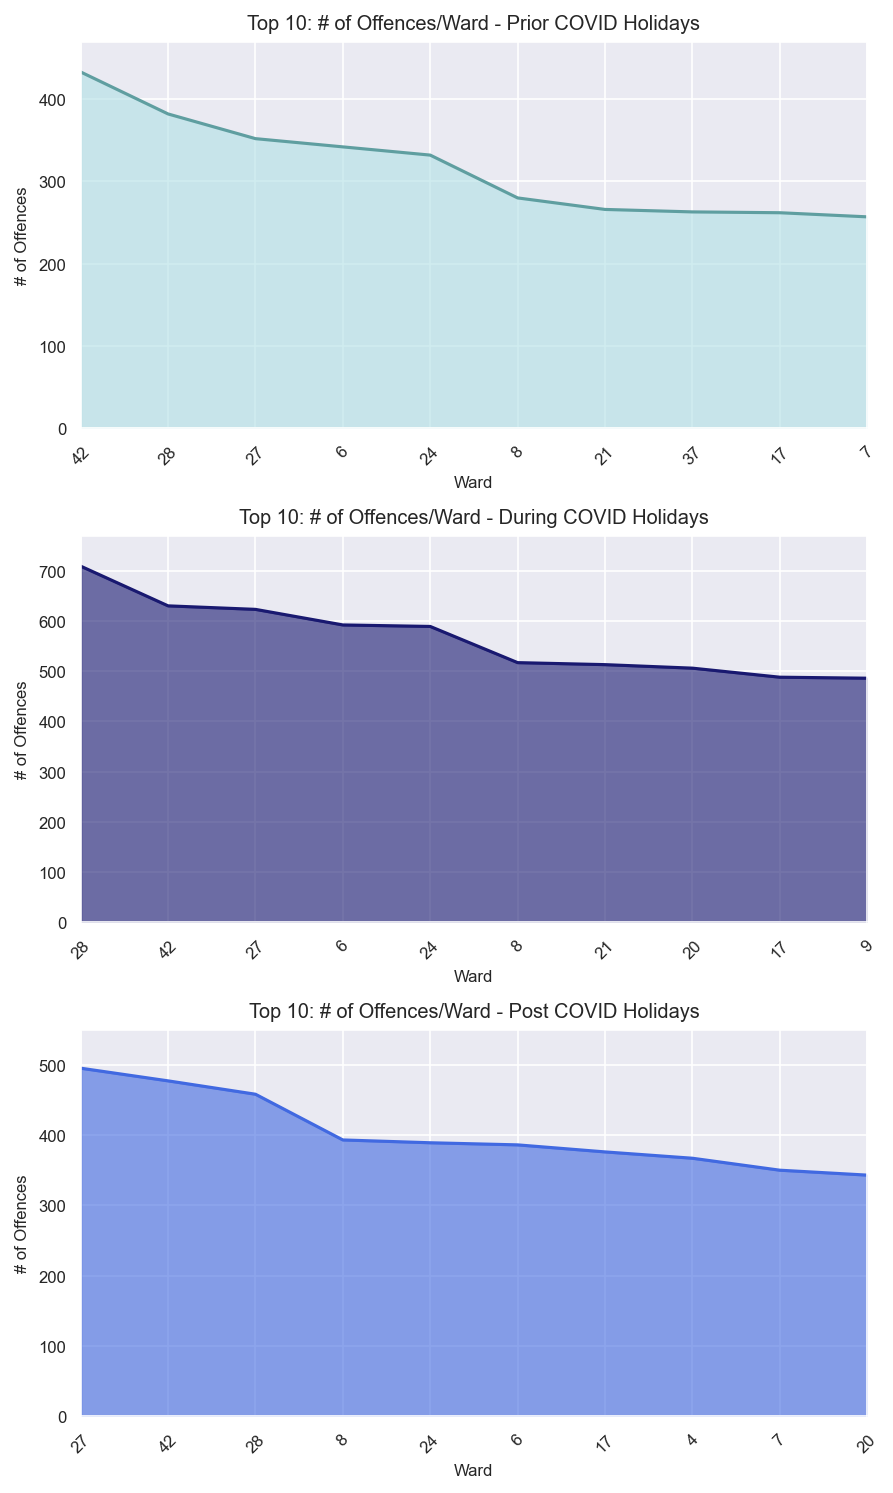

In [104]:

# Filter and group the data for each COVID period
prior = holiday_df.loc[(holiday_df['Ward'] != 'Blank') & (holiday_df['COVID Period'] == 'Prior COVID Holidays')].groupby('Ward')['Holiday_name'].count().sort_values(ascending=False).iloc[:10]
during = holiday_df.loc[(holiday_df['Ward'] != 'Blank') & (holiday_df['COVID Period'] == 'During COVID Holidays')].groupby('Ward')['Holiday_name'].count().sort_values(ascending=False).iloc[:10]
post = holiday_df.loc[(holiday_df['Ward'] != 'Blank') & (holiday_df['COVID Period'] == 'Post COVID Holidays')].groupby('Ward')['Holiday_name'].count().sort_values(ascending=False).iloc[:10]

# Get the unique wards and their count values
wards = np.arange(len(prior))  # Using the same length for all COVID periods
prior_count = prior.values
during_count = during.values
post_count = post.values

# Create separate figures for each COVID period
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

# Figure for Prior COVID Holidays
axes[0].fill_between(wards, 0, prior_count, color='powderblue', alpha=0.6)
axes[0].plot(wards, prior_count, color='cadetblue', linewidth=1.5)
axes[0].set_xticks(wards)
axes[0].set_xticklabels(prior.index, rotation=45)
axes[0].set_xlabel('Ward')
axes[0].set_ylabel('# of Offences')
axes[0].set_title('Top 10: # of Offences/Ward - Prior COVID Holidays')
axes[0].set_xlim(wards[0], wards[-1])
axes[0].set_ylim(0, 470)

# Figure for During COVID Holidays
axes[1].fill_between(wards, 0, during_count, color='midnightblue',alpha=0.6)
axes[1].plot(wards, during_count, color='midnightblue', linewidth=1.5)
axes[1].set_xticks(wards)
axes[1].set_xticklabels(during.index, rotation=45)
axes[1].set_xlabel('Ward')
axes[1].set_ylabel('# of Offences')
axes[1].set_title('Top 10: # of Offences/Ward - During COVID Holidays')
axes[1].set_xlim(wards[0], wards[-1])
axes[1].set_ylim(0, 770)

# Figure for Post COVID Holidays
axes[2].fill_between(wards, 0, post_count,color='royalblue',alpha=0.6)
axes[2].plot(wards, post_count, color='royalblue', linewidth=1.5)
axes[2].set_xticks(wards)
axes[2].set_xticklabels(post.index, rotation=45)
axes[2].set_xlabel('Ward')
axes[2].set_ylabel('# of Offences')
axes[2].set_title('Top 10: # of Offences/Ward - Post COVID Holidays')
axes[2].set_xlim(wards[0], wards[-1])
axes[2].set_ylim(0, 550)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()